In [1]:
# K-Means法を使う

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = [entry.path for entry in os.scandir("datas")]

In [4]:
path 

['datas/cell_data.csv', 'datas/cell_data_additional.csv']

In [5]:
df1 = pd.read_csv(path[0])

In [6]:
df1.head()

,UID,X1,X2,CellType,Donor
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,T,A16
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,T,A16
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,T,A16
3,4861STDY7462257-AAGACCTCACGAGAGT,2.936845,-8.620646,T,A16
4,4861STDY7462257-AAGCCGCTCTAACTTC,-5.834578,0.225145,T,A16


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UID       5938 non-null   object 
 1   X1        5938 non-null   float64
 2   X2        5938 non-null   float64
 3   CellType  5938 non-null   object 
 4   Donor     5938 non-null   object 
dtypes: float64(2), object(3)
memory usage: 232.1+ KB


In [8]:
df2 = pd.read_csv(path[1])

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UID     1485 non-null   object 
 1   X1      1485 non-null   float64
 2   X2      1485 non-null   float64
dtypes: float64(2), object(1)
memory usage: 34.9+ KB


In [10]:
# df1 学習データ
# x1, x2でグラフとして表示

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


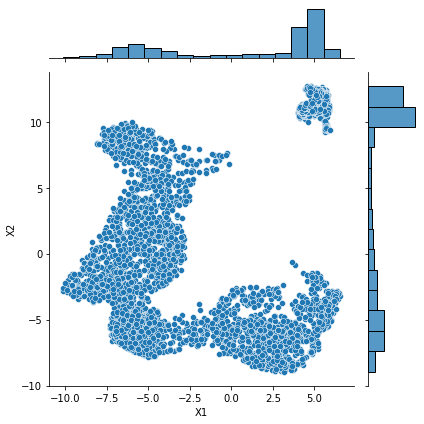

In [11]:
sns.jointplot(df1["X1"], df1["X2"])
plt.tight_layout()
plt.show()

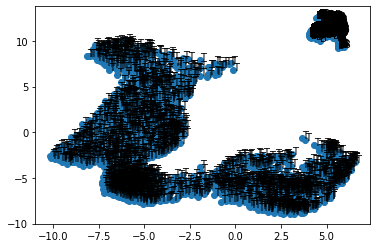

In [12]:
x = list(df1["X1"])
y = list(df1["X2"])

plt.scatter(x, y)

annotations = df1["CellType"]
for i, label in enumerate(list(annotations)):
    plt.annotate(label, (x[i], y[i]))
                          
plt.show()

In [13]:
df1["CellType"].value_counts()

T    2979
B    2959
Name: CellType, dtype: int64

In [14]:
#ユークリッド距離を求める
#差の二乗の平方根
# ((x2-x1)**2)**0.5

In [15]:

euclid = lambda x1, x2: ((x2-x1)**2)**0.5

sqrt_ = [euclid(x1, x2) for x1, x2 in zip(df1["X1"], df1["X2"])]
    



In [16]:
#求めた距離を追加
df1["euclid"] = sqrt_

In [17]:
df1.head()

,UID,X1,X2,CellType,Donor,euclid
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,T,A16,9.895087
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,T,A16,10.001030
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,T,A16,0.578931
3,4861STDY7462257-AAGACCTCACGAGAGT,2.936845,-8.620646,T,A16,11.557491
4,4861STDY7462257-AAGCCGCTCTAACTTC,-5.834578,0.225145,T,A16,6.059723


In [18]:
#Celltype(質的データ)を量的データに置き換える
#T=>0
#B=>1

#無名関数
#lambda 引数: trueの結果 if文 else falseの結果
#dataが"T"のとき0, そうじゃないとき("B"のとき)1
toQuantitative = lambda data: 0 if data == "T" else 1

#df1["CellType"]の各値全てにtoQuantitative関数を実行する
q = list(map(toQuantitative, df1["CellType"]))
#以下と同義

# q = []
# for data in df1["CellType"]:
#     res = toQuantitative(data)
#     q.append(res)

#**こんなテクニカルな書き方をしている理由はpythonの場合こっちの方が簡潔にかけて実行速度が速いからです

In [19]:
#CellTypeを量的データに変換
df1.loc[:, "CellType"] =  q

In [20]:
df1.head()

,UID,X1,X2,CellType,Donor,euclid
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,0,A16,9.895087
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,0,A16,10.001030
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,0,A16,0.578931
3,4861STDY7462257-AAGACCTCACGAGAGT,2.936845,-8.620646,0,A16,11.557491
4,4861STDY7462257-AAGCCGCTCTAACTTC,-5.834578,0.225145,0,A16,6.059723


In [21]:
index = df1.index
idnex = list(index)

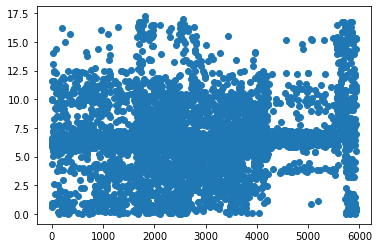

In [22]:
plt.scatter(index, df1["euclid"])

In [23]:
#TとBの信頼区間を求めて分類??

In [24]:
df1[df1["CellType"] == 0]

,UID,X1,X2,CellType,Donor,euclid
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,0,A16,9.895087
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,0,A16,10.001030
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,0,A16,0.578931
3,4861STDY7462257-AAGACCTCACGAGAGT,2.936845,-8.620646,0,A16,11.557491
4,4861STDY7462257-AAGCCGCTCTAACTTC,-5.834578,0.225145,0,A16,6.059723
...,...,...,...,...,...,...
5933,WSSS8084745-TTCCAATTCTTCGGTC,-4.503428,6.253497,0,C41,10.756925
5934,WSSS8084745-TTCGCTGTCTGGCCGA,-5.760673,-5.363388,0,C41,0.397285
5935,WSSS8084745-TTGACCCGTACGTGAG,-5.284623,5.622713,0,C41,10.907336
5936,WSSS8084745-TTGTGTTCAGTTGCGC,-4.376831,5.115676,0,C41,9.492507


In [25]:
df1_t = df1[df1["CellType"] == 0] 

In [26]:
#T細胞のユークリッド距離の信頼区間を求める

#個人で分けるか =>donarは指標にない

<AxesSubplot:xlabel='euclid', ylabel='Count'>

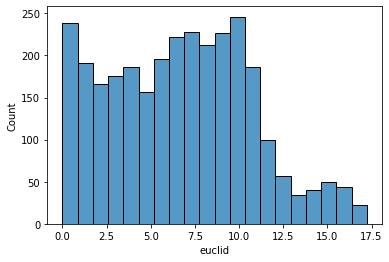

In [27]:
sns.histplot(df1_t["euclid"])

In [28]:
df1_B = df1[df1["CellType"] == 1] 

<AxesSubplot:xlabel='euclid', ylabel='Count'>

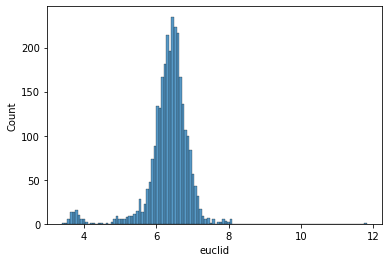

In [29]:
sns.histplot(df1_B["euclid"])

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UID     1485 non-null   object 
 1   X1      1485 non-null   float64
 2   X2      1485 non-null   float64
dtypes: float64(2), object(1)
memory usage: 34.9+ KB


In [31]:
df2.head()

,UID,X1,X2
0,4861STDY7462257-AGCAGCCCACGAAAGC,-1.536547,-5.808322
1,4861STDY7462257-AGCGTCGTCTCTAAGG,4.265754,10.928544
2,4861STDY7462257-CAAGATCCAATAGAGT,4.729420,10.987251
3,4861STDY7462257-CATATTCTCGCATGAT,4.762176,10.914634
4,4861STDY7462257-CATCGGGTCAGAGACG,4.917956,10.564189


In [32]:
euclid = lambda x1, x2: ((x2-x1)**2)**0.5
sqrt_ = [euclid(x1, x2) for x1, x2 in zip(df2["X1"], df2["X2"])]

In [33]:
df2["euclid"] = sqrt_

In [34]:
df2

,UID,X1,X2,euclid
0,4861STDY7462257-AGCAGCCCACGAAAGC,-1.536547,-5.808322,4.271775
1,4861STDY7462257-AGCGTCGTCTCTAAGG,4.265754,10.928544,6.662790
2,4861STDY7462257-CAAGATCCAATAGAGT,4.729420,10.987251,6.257831
3,4861STDY7462257-CATATTCTCGCATGAT,4.762176,10.914634,6.152457
4,4861STDY7462257-CATCGGGTCAGAGACG,4.917956,10.564189,5.646233
...,...,...,...,...
1480,WSSS8084745-TCTCCGAGTTAAACCC,-7.931678,-0.389372,7.542306
1481,WSSS8084745-TGAATGCCAAAGGCAC,-7.335319,9.316230,16.651549
1482,WSSS8084745-TGTTCTAAGAAGTCTA,-5.975731,8.621099,14.596830
1483,WSSS8084745-TTTGGTTAGACCACGA,-6.687650,8.830683,15.518333


<AxesSubplot:xlabel='euclid', ylabel='Count'>

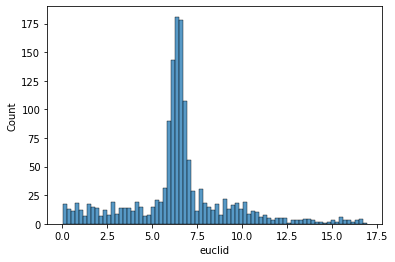

In [35]:
sns.histplot(df2["euclid"])

In [36]:
#確率

##T
# 平均
avg = sum(df1_t["euclid"]) / len(df1_t["euclid"])

#分散
v = sum([(v-avg)**2 for v in df1_t["euclid"]])/ len(df1_t["euclid"])

# 標準偏差
std_t = v ** 0.5
    
print(std_t)

4.023037351218009


In [37]:
#確率

##B
# 平均
avg = sum(df1_B["euclid"]) / len(df1_B["euclid"])

#分散
v = sum([(v-avg)**2 for v in df1_B["euclid"]])/ len(df1_B["euclid"])

# 標準偏差
std_b = v ** 0.5
    
print(std_b)

0.5977649193574026


In [38]:
df2["UID"].value_counts()

T06_TH_TOT_5GEX_1_S9-GTGGGTCGTATGCTTG     1
4861STDY7528592-TACAGTGAGGCCATAG          1
4861STDY7528587-GTATCTTGTATGCTTG          1
T06_TH_TOT_5GEX_2_S10-TTGGCAATCTATGTGG    1
WSSS8062669-ACACTGAGTACCGAGA              1
                                         ..
4861STDY7462261-AGCGTATCAGGAACGT          1
T03_TH_TOT_5GEX_2_S2-GACCTGGAGGGATACC     1
T07_TH_TOT_2_S2-ATAAGAGTCCAAGTAC          1
WSSS8062669-GACTACAAGAAACGAG              1
4861STDY7462260-AACCATGCACGCGAAA          1
Name: UID, Length: 1485, dtype: int64

In [39]:
repalce_uid = lambda x: x.split("-")[0]
df1["UID_cut"] = [repalce_uid(x) for x in df1["UID"]]

In [40]:
df1["UID_cut"].value_counts()

WSSS8062669               1199
T07_TH_TOT_1_S1            315
T06_TH_TOT_5GEX_3_S11      233
T06_TH_TOT_5GEX_1_S9       231
T07_TH_TOT_2_S2            213
T06_TH_TOT_5GEX_4_S12      185
T06_TH_TOT_5GEX_2_S10      178
4861STDY7528592            162
4861STDY7462264            161
Human_colon_16S7985396     154
4861STDY7462262            134
4861STDY7462261            134
WSSS8062674                134
4861STDY7528590            133
FCAImmP7851893             131
T03_TH_TOT_5GEX_2_S2       127
FCAImmP7851891             126
4861STDY7462263            125
WSSS8084745                123
4861STDY7528589            122
FCAImmP7851890             122
FCAImmP7851894             119
FCAImmP7851895             113
4861STDY7528591            106
FCAImmP7851892             103
WSSS8084744                 99
4861STDY7528588             90
4861STDY7528587             88
WSSS8084742                 84
WSSS8084743                 80
4861STDY7528586             80
4861STDY7462260             73
T03_TH_T

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UID       5938 non-null   object 
 1   X1        5938 non-null   float64
 2   X2        5938 non-null   float64
 3   CellType  5938 non-null   int64  
 4   Donor     5938 non-null   object 
 5   euclid    5938 non-null   float64
 6   UID_cut   5938 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 324.9+ KB


In [42]:
repalce_uid = lambda x: x.split("-")[0]
df2["UID_cut"] = [repalce_uid(x) for x in df2["UID"]]

In [43]:
df2["UID_cut"].value_counts()

WSSS8062669               298
T07_TH_TOT_1_S1            68
T06_TH_TOT_5GEX_3_S11      65
T07_TH_TOT_2_S2            56
4861STDY7462261            52
T06_TH_TOT_5GEX_1_S9       49
4861STDY7462262            46
T06_TH_TOT_5GEX_4_S12      45
4861STDY7528591            42
WSSS8084744                39
4861STDY7462263            39
T06_TH_TOT_5GEX_2_S10      38
Human_colon_16S7985396     35
WSSS8062674                35
4861STDY7528589            33
4861STDY7528592            33
FCAImmP7851892             33
WSSS8084745                33
T03_TH_TOT_5GEX_2_S2       32
FCAImmP7851894             30
WSSS8084742                29
4861STDY7462264            27
FCAImmP7851891             27
4861STDY7462260            25
4861STDY7528590            25
FCAImmP7198432             24
T03_TH_TOT_5GEX_1_S1       23
4861STDY7462258            23
4861STDY7528586            23
WSSS8084743                23
FCAImmP7851890             20
FCAImmP7851895             20
FCAImmP7851893             19
4861STDY75

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UID      1485 non-null   object 
 1   X1       1485 non-null   float64
 2   X2       1485 non-null   float64
 3   euclid   1485 non-null   float64
 4   UID_cut  1485 non-null   object 
dtypes: float64(3), object(2)
memory usage: 58.1+ KB


In [45]:
df1["Donor"].value_counts()

A16    1655
A43    1333
T06     827
T07     528
F67     466
F64     248
C41     222
F74     216
T03     199
C40     164
F22      69
C34      11
Name: Donor, dtype: int64

In [46]:
df1[df1["Donor"] == "A16"]

,UID,X1,X2,CellType,Donor,euclid,UID_cut
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,0,A16,9.895087,4861STDY7462257
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,0,A16,10.001030,4861STDY7462257
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,0,A16,0.578931,4861STDY7462257
3,4861STDY7462257-AAGACCTCACGAGAGT,2.936845,-8.620646,0,A16,11.557491,4861STDY7462257
4,4861STDY7462257-AAGCCGCTCTAACTTC,-5.834578,0.225145,0,A16,6.059723,4861STDY7462257
...,...,...,...,...,...,...,...
1650,4861STDY7528592-TTGACTTTCGTTTATC,5.193381,-3.719858,0,A16,8.913239,4861STDY7528592
1651,4861STDY7528592-TTGTAGGTCTACGAGT,6.464887,-2.965160,0,A16,9.430047,4861STDY7528592
1652,4861STDY7528592-TTTATGCAGATAGCAT,-2.299679,-5.222311,0,A16,2.922632,4861STDY7528592
1653,4861STDY7528592-TTTGCGCTCGCCAAAT,4.830789,11.055047,1,A16,6.224258,4861STDY7528592


In [47]:
a = df1["UID_cut"].value_counts()
b = df2["UID_cut"].value_counts()

In [48]:
print(len(a))
print(len(b))

40
40


In [49]:
df1[df1["UID_cut"] == "4861STDY7528592"]["CellType"].value_counts()

1    104
0     58
Name: CellType, dtype: int64

<AxesSubplot:xlabel='euclid', ylabel='Count'>

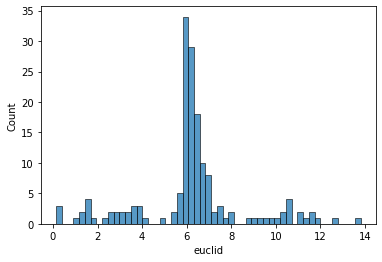

In [50]:
sns.histplot(df1[df1["UID_cut"] == "4861STDY7528592"]["euclid"])

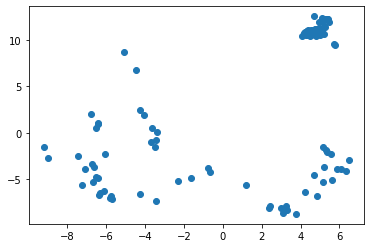

In [51]:
# index = df1[df1["UID_cut"] == "4861STDY7528592"]["euclid"].
x = df1[df1["UID_cut"] == "4861STDY7528592"]["X1"]
y = df1[df1["UID_cut"] == "4861STDY7528592"]["X2"]
plt.scatter(x, y)

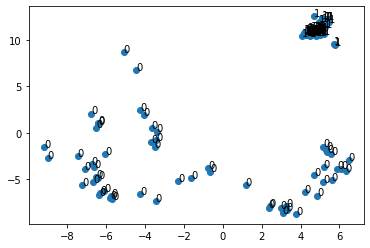

In [52]:
plt.scatter(x, y)

annotations = df1[df1["UID_cut"] == "4861STDY7528592"]["CellType"]
for i, label in enumerate(list(annotations)):
    plt.annotate(label, (list(x)[i], list(y)[i]))
                          
plt.show()

In [53]:

##x1とx2のから閾値を決めて分類す